In [1]:
import pandas as pd
#from: https://www.dataquest.io/blog/learning-curves-machine-learning/

In [2]:
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/Folds5x2_pp.xlsx'
electricity = pd.read_excel(address)

In [3]:
print(electricity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


In [4]:
electricity.head(3)
#Meaning of cats: AT(ambiental temperature), V(exhaust vacuum), AP(ambiental pressure),
#RH(relative humidity), PE(electrical energy output == target var)

#Other notes: didn't explore, remove outliers, look at correlations
#no missing values, and numbers are unscaled

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [5]:
#We want an 80/20 train/test ratio. we'll try 6 sizes 
train_sizes = [1, 100, 500, 2000, 5000, 7654]
#for each of these sizes, a new model is trained
#with CV, we make k models for each training size
#good practice to limit to 5-10 training sizes.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [7]:
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'
#decalre the features and target variable (X's and y)

In [9]:
#use learning curve to generate data needed to plot a learning curve
#returns a tuple w/ 3 elements: training set sizes, error scores on validation set,
#error scores on training set

#We specify the following parameters:
    #estimator: learning algorithm we use to estimate the true model
    #X (features), y(target)
    #train_sizes = specifies training set sizes to be used (specified above)
    #cv: cross validation splitting strategy
        #We specified 5 - so they did 5-fold cross validation
    #scoring: error metric to use 
        #we want MSE, but can't use it, so we use negative MSE 

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = electricity[features],
                                                   y = electricity[target], train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [10]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)
#This will tell us error scores for training sets and validation scores for test set

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [11]:
#To plot the learning curve, we want a single error score per training set size
#so, we need to average each row. We also have to flip the sign on mse

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 --------------------

Mean validation scores

 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


In [12]:
#NOTE: for unshuffled data, we need shuffle=True in learning_curve() function

(0, 40)

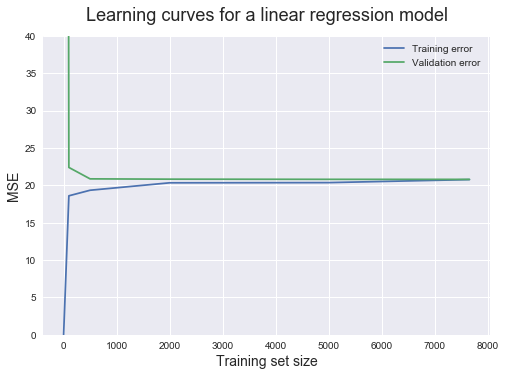

In [13]:
#Plot the learning curves.
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

In [15]:
#Explanation: when training set is 1, MSE for training is 0 (b/c model can easily fit
    #a single data point. But when tested w/ validation set, MSE is huge - very unlikely
    #that a model trained on one data point will perform well on the 1900 test cases)
    
    #When training set is 100, training MSE increases and validation MSE decreases sharply
    #Model performs much better on validation data, b/c trained w/ 100 data points.
    
    #From 400 training datapoints on, MSE is roughly the same. Don't get much improvement
    #from increasing the training size. So the better approach is to change algorithms.

    #Adding more observations won't help, but adding more features could (B/c will 
    #increase the complexity of the model)
    
#THIS IS A HIGH BIAS/LOW VARIANCE CASE.

#What about a random forest regression?

In [16]:
#This builds our previous work into a function, so we can replicate it easily
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
                                                 estimator, data[features], data[target], train_sizes = train_sizes,
                                                 cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)

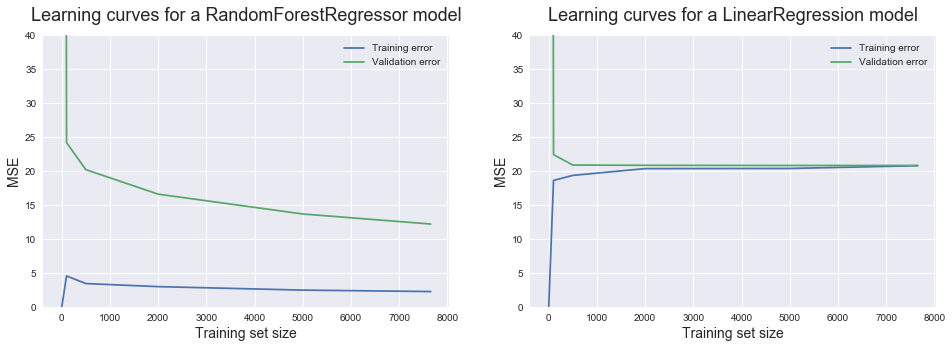

In [17]:
#Once everything is in a function, we can change which model we want to run easily
# - and compare the two learning curves.

from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (16,5))

for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, electricity, features, target, train_sizes, 5)

In [ ]:
#EXPLANATION:
    #The gap b/w these two lines is large, meaning variance is large, and we can see
    #real improvement from increasing the training set size. By increasing the 
    #variance, we've reduced the bias
    
    #Low training MSE = high variance
    
    #Large gap/low training error = overfitting problem b/c model performs well
    #on the training set but much worse on the test set.
    
#THIS IS A HIGH VARIANCE/LOW BIAS CASE.

#How to fix? Try regularizing: adjust max number of leaf nodes in each decision tree

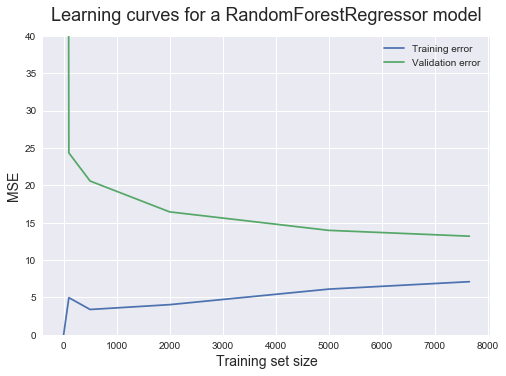

In [18]:
learning_curves(RandomForestRegressor(max_leaf_nodes = 350), electricity, features, target, train_sizes, 5)

In [ ]:
#This narrows the gap from above, reducing variance and increasing bias